# Feature Engineering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

In [103]:
df = pd.read_csv('Invistico_Airline.csv')
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [105]:
df.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [106]:
for i in df.columns:
    if df[i].isnull().any():
        if df[i].dtype == 'object':
            df[i].fillna(df[i].mode()[0], inplace=True)
        else:
            df[i].fillna(df[i].mean(), inplace=True)


/var/folders/2z/kf92m3b96t51tf0khtbqm3xh0000gn/T/ipykernel_16302/466934672.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mean(), inplace=True)


In [107]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [108]:
df.drop(['Gender','Type of Travel', 'Customer Type'], axis=1, inplace= True)

In [109]:
df['satisfaction'] = df['satisfaction'].map(
    {'satisfied':1, 
    'neutral': 0,
    'dissatisfied':-1})

In [110]:
cat_col = df.select_dtypes(include=['object']).columns
num_col = df.select_dtypes(include=['int64', 'float64']).columns

encoder = LabelEncoder()
for col in cat_col:
    cardinality = df[col].nunique()
    if cardinality <= 4:
        # one-hot encoding
        dummies = pd.get_dummies(df[col], prefix=col, dtype=int)
        # drop the original column and merge the dummy columns
        df = pd.concat([df.drop(col, axis=1), dummies], axis=1)
    else:
        # Apply label encoding
        df[col] = encoder.fit_transform(df[col])


In [111]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  int64  
 1   Age                                129880 non-null  int64  
 2   Flight Distance                    129880 non-null  int64  
 3   Seat comfort                       129880 non-null  int64  
 4   Departure/Arrival time convenient  129880 non-null  int64  
 5   Food and drink                     129880 non-null  int64  
 6   Gate location                      129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Inflight entertainment             129880 non-null  int64  
 9   Online support                     129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  On-board service                   1298

,satisfaction,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,...,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Class_Business,Class_Eco,Class_Eco Plus
0,1,65,265,0,0,0,2,2,4,2,...,0,3,5,3,2,0,0.0,0,1,0
1,1,47,2464,0,0,0,3,0,2,2,...,4,4,2,3,2,310,305.0,1,0,0
2,1,15,2138,0,0,0,3,2,0,2,...,3,4,4,4,2,0,0.0,0,1,0
3,1,60,623,0,0,0,3,3,4,3,...,0,1,4,1,3,0,0.0,0,1,0
4,1,70,354,0,0,0,3,4,3,4,...,0,2,4,2,5,0,0.0,0,1,0


In [114]:
scaler = StandardScaler()
cols = df.columns[df.columns != 'satisfaction']
df[cols] = scaler.fit_transform(df[cols])
df.head()

,satisfaction,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,...,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Class_Business,Class_Eco,Class_Eco Plus
0,1,1.691351,-1.671103,-2.037791,-1.95823,-1.975443,-0.758383,-0.947163,0.458022,-1.163181,...,-2.697605,-0.601544,1.316217,-0.612761,-1.041485,-0.386481,-0.392924,-0.958070,1.107900,-0.279499
1,1,0.500820,0.469852,-2.037791,-1.95823,-1.975443,0.007334,-2.463679,-1.027802,-1.163181,...,0.397840,0.263150,-1.063645,-0.612761,-1.041485,7.756204,7.548283,1.043766,-0.902608,-0.279499
2,1,-1.615680,0.152458,-2.037791,-1.95823,-1.975443,0.007334,-0.947163,-2.513627,-1.163181,...,-0.376021,0.263150,0.522929,0.255469,-1.041485,-0.386481,-0.392924,-0.958070,1.107900,-0.279499
3,1,1.360648,-1.322552,-2.037791,-1.95823,-1.975443,0.007334,-0.188905,0.458022,-0.397781,...,-2.697605,-2.330931,0.522929,-2.349219,-0.271490,-0.386481,-0.392924,-0.958070,1.107900,-0.279499
4,1,2.022054,-1.584452,-2.037791,-1.95823,-1.975443,0.007334,0.569353,-0.284890,0.367620,...,-2.697605,-1.466238,0.522929,-1.480990,1.268500,-0.386481,-0.392924,-0.958070,1.107900,-0.279499


# Mutual Info

In [142]:
from sklearn.feature_selection import mutual_info_classif
X = df.copy()
y = df['satisfaction']

In [129]:
mi_scores = mutual_info_classif(df[cols], y)

In [137]:
mi_scores = pd.Series(mi_scores, index=df[cols].columns)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores

Inflight entertainment               0.235206
Seat comfort                         0.141223
Ease of Online booking               0.109886
Online support                       0.100707
On-board service                     0.071239
Online boarding                      0.067338
Leg room service                     0.062213
Class_Business                       0.057234
Baggage handling                     0.055468
Cleanliness                          0.050632
Class_Eco                            0.047401
Checkin service                      0.043909
Food and drink                       0.039739
Inflight wifi service                0.035928
Flight Distance                      0.029095
Age                                  0.022564
Gate location                        0.013889
Arrival Delay in Minutes             0.008538
Departure Delay in Minutes           0.006136
Class_Eco Plus                       0.004765
Departure/Arrival time convenient    0.001218
dtype: float64

In [141]:
# function to find mi scores
def mi_score_top(df, target_qiymat):
    mi_scores = mutual_info_classif(df, target_qiymat)
    mi_scores = pd.Series(mi_scores, index=df.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores
print(mi_score_top(df, y))

satisfaction                         0.709434
Inflight entertainment               0.235577
Seat comfort                         0.142393
Ease of Online booking               0.109356
Online support                       0.100181
On-board service                     0.070653
Online boarding                      0.065870
Leg room service                     0.060292
Class_Business                       0.058088
Baggage handling                     0.052406
Cleanliness                          0.050606
Class_Eco                            0.047353
Checkin service                      0.042630
Food and drink                       0.039782
Inflight wifi service                0.034730
Flight Distance                      0.029692
Age                                  0.022856
Gate location                        0.010742
Class_Eco Plus                       0.008567
Departure Delay in Minutes           0.007188
Arrival Delay in Minutes             0.006548
Departure/Arrival time convenient 

In [115]:
x= df.drop('satisfaction', axis=1)
y = df['satisfaction']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=42)
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [116]:
y_pred = dt_model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('MSE: ',mse)
print('R2: ',r2)

MSE:  0.30582075762242067
R2:  0.6913476825452256


In [145]:
mi_scores_df = pd.DataFrame(mi_scores, index=df[cols].columns, columns=['Mutual Information'])
mi_scores_df = mi_scores_df.sort_values(by='Mutual Information', ascending=False)
mi_scores_df.head(5)
top_scores = mi_scores_df.index[:5]

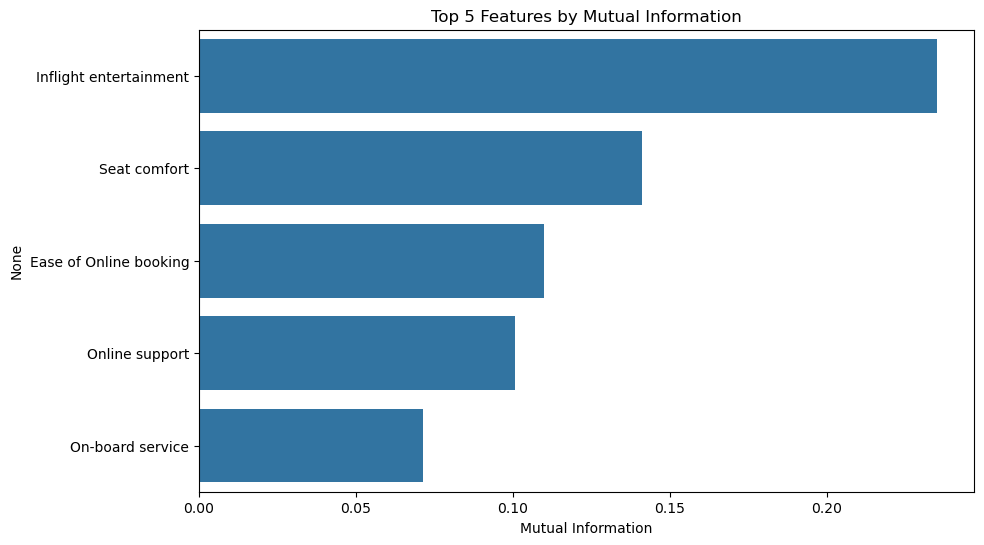

In [149]:
plt.figure(figsize=(10, 6))
sns.barplot(x=mi_scores_df['Mutual Information'][:5], y=mi_scores_df.index[:5])
plt.title('Top 5 Features by Mutual Information')
plt.show()